In [20]:
import numpy;
import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

from tqdm import tqdm;

In [21]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [22]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self, feature, label):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();

        # Weight initial
        self.weight_x1 = initializer[0][0];
        self.weight_x2 = initializer[0][1];

        # Bias just in case
        self.bias = initializer[0][2];

        # Load dataset
        self.feature = feature;
        self.label = label;
    
        print("AdalineLMS initial configuration:");
        print(f"weight x1 {self.weight_x1} - weight x2: {self.weight_x2} - bias: {self.bias}");
        print("\n\n\n");

    # Mean Squared Error
    def _mse(self, prediction):
        return numpy.mean((self.label - prediction) ** 2);

    # Feed Forward process
    def forward(self):
        predictions = [];

        for i in self.feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]) + self.bias;

            predictions.append(prediction);

        return predictions;

    # Learning Rule: LMS Implementation
    def learning_rule(self, predictions):

        # new weight x1 = current weight + (learning rate x (ground truth - prediction) x x1
        for i in tqdm(range(len(self.feature))):
            truth_difference = (self.label[i] - predictions[i]);

            new_weight_x1 = (self.weight_x1 + (self.learning_rate * truth_difference * self.feature[i][0]));
            new_weight_x2 = (self.weight_x2 + (self.learning_rate * truth_difference * self.feature[i][1]));
            new_bias = self.bias + self.learning_rate * truth_difference;

            # print(f"new_weight_x1: {new_weight[0]} - new_weight_x2: {new_weight[1]}")
    
            self.weight_x1 = new_weight_x1;
            self.weight_x2 = new_weight_x2;
            self.bias = new_bias;
    
    def train(self):

        loss_history = [];
        
        # Loop 200 epochs
        for i in range(self.epoch):
            
            print(f"Epoch [{i + 1} / {self.epoch}] -", end = " ");

            loss = 0.0;

            # Forward pass 
            predictions = self.forward();

            # Count current epoch's loss
            loss = self._mse(predictions);

            # Apply LMS to update weight
            self.learning_rule(predictions);
                

            loss_history.append(loss);
            print(f"Epoch {i + 1} - loss: {round(loss, 4)} - weight x1: {self.weight_x1} - weight x2: {self.weight_x2}\n");

         # Plotting MSE curve
        plt.figure(figsize=(10, 6));
        plt.plot(range(self.epoch), loss_history, label='MSE');
        plt.xlabel('Epoch');
        plt.ylabel('Mean Squared Error');
        plt.title('MSE over Epochs');
        plt.legend();
        plt.show()           


AdalineLMS initial configuration:
weight x1 0.4995368719100952 - weight x2: 0.4888303279876709 - bias: 0.511054277420044




Epoch [1 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 1 - loss: 2.3029 - weight x1: 0.06363255707025531 - weight x2: -0.14510075806856154

Epoch [2 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 2 - loss: 1.0994 - weight x1: 0.11335790675996708 - weight x2: -0.08904535009542353

Epoch [3 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 3 - loss: 0.993 - weight x1: 0.04178437240515215 - weight x2: -0.20140474313426737

Epoch [4 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 4 - loss: 0.956 - weight x1: 9.286552094761591e-05 - weight x2: -0.26876205530871444

Epoch [5 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 5 - loss: 0.9244 - weight x1: -0.049199303534051136 - weight x2: -0.34439572789486966

Epoch [6 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 6 - loss: 0.8945 - weight x1: -0.09664263375434753 - weight x2: -0.415206240842264

Epoch [7 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 7 - loss: 0.8657 - weight x1: -0.14447950655007016 - weight x2: -0.4845990268816672

Epoch [8 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 8 - loss: 0.8381 - weight x1: -0.19205495181284932 - weight x2: -0.5518610648989218

Epoch [9 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 9 - loss: 0.8116 - weight x1: -0.239445872414694 - weight x2: -0.617293801830422

Epoch [10 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 10 - loss: 0.7862 - weight x1: -0.2865569087128377 - weight x2: -0.6809367979231504

Epoch [11 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 11 - loss: 0.7617 - weight x1: -0.3333444775574187 - weight x2: -0.742886167395052

Epoch [12 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 12 - loss: 0.7382 - weight x1: -0.3797601651314155 - weight x2: -0.8032160953178661

Epoch [13 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 13 - loss: 0.7157 - weight x1: -0.42576403531710805 - weight x2: -0.8619990555445349

Epoch [14 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 14 - loss: 0.6939 - weight x1: -0.4713206127280358 - weight x2: -0.9193014051601744

Epoch [15 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 15 - loss: 0.6731 - weight x1: -0.516399242663883 - weight x2: -0.9751850492096923

Epoch [16 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 16 - loss: 0.653 - weight x1: -0.5609734215441605 - weight x2: -1.0297075431380587

Epoch [17 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 17 - loss: 0.6337 - weight x1: -0.6050204376444341 - weight x2: -1.0829225369859141

Epoch [18 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8010.13it/s]


Epoch 18 - loss: 0.6151 - weight x1: -0.6485209837314727 - weight x2: -1.13488009186269

Epoch [19 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 19 - loss: 0.5972 - weight x1: -0.6914588212640815 - weight x2: -1.1856269894459395

Epoch [20 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7110.50it/s]


Epoch 20 - loss: 0.58 - weight x1: -0.7338204722131415 - weight x2: -1.235207008022388

Epoch [21 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 21 - loss: 0.5635 - weight x1: -0.7755949407178103 - weight x2: -1.2836611748952627

Epoch [22 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 22 - loss: 0.5476 - weight x1: -0.8167734606296715 - weight x2: -1.3310279956492899

Epoch [23 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 23 - loss: 0.5323 - weight x1: -0.8573492668442092 - weight x2: -1.3773436628166345

Epoch [24 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 24 - loss: 0.5175 - weight x1: -0.8973173881437926 - weight x2: -1.4226422457308314

Epoch [25 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 25 - loss: 0.5034 - weight x1: -0.9366744595782417 - weight x2: -1.46695586332098

Epoch [26 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 26 - loss: 0.4897 - weight x1: -0.9754185525684043 - weight x2: -1.5103148414046983

Epoch [27 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 27 - loss: 0.4766 - weight x1: -1.0135490210913667 - weight x2: -1.552747855902804

Epoch [28 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 28 - loss: 0.464 - weight x1: -1.0510663624560381 - weight x2: -1.5942820632656165

Epoch [29 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 29 - loss: 0.4518 - weight x1: -1.0879720913158775 - weight x2: -1.634943219282449

Epoch [30 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 30 - loss: 0.4401 - weight x1: -1.1242686256904024 - weight x2: -1.6747557873378478

Epoch [31 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 31 - loss: 0.4288 - weight x1: -1.1599591838805658 - weight x2: -1.713743037080219

Epoch [32 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 32 - loss: 0.418 - weight x1: -1.1950476912660506 - weight x2: -1.7519271343795622

Epoch [33 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 33 - loss: 0.4076 - weight x1: -1.2295386960659962 - weight x2: -1.7893292233703257

Epoch [34 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 34 - loss: 0.3975 - weight x1: -1.2634372932295173 - weight x2: -1.825969501302109

Epoch [35 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 35 - loss: 0.3879 - weight x1: -1.2967490556993941 - weight x2: -1.861867286854433

Epoch [36 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 36 - loss: 0.3786 - weight x1: -1.3294799723622153 - weight x2: -1.8970410825114066

Epoch [37 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 37 - loss: 0.3696 - weight x1: -1.361636392061727 - weight x2: -1.931508631537296

Epoch [38 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 38 - loss: 0.361 - weight x1: -1.3932249731097373 - weight x2: -1.965286970044241

Epoch [39 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7704.81it/s]


Epoch 39 - loss: 0.3527 - weight x1: -1.4242526377812246 - weight x2: -1.9983924745981843

Epoch [40 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 40 - loss: 0.3448 - weight x1: -1.454726531327751 - weight x2: -2.0308409057680583

Epoch [41 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 41 - loss: 0.3371 - weight x1: -1.4846539850863856 - weight x2: -2.0626474479860497

Epoch [42 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 42 - loss: 0.3297 - weight x1: -1.5140424833004331 - weight x2: -2.093826746052948

Epoch [43 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 43 - loss: 0.3226 - weight x1: -1.5428996333037803 - weight x2: -2.1243929385919076

Epoch [44 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 44 - loss: 0.3157 - weight x1: -1.571233138752882 - weight x2: -2.1543596887260885

Epoch [45 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 4059.82it/s]


Epoch 45 - loss: 0.3092 - weight x1: -1.599050775619671 - weight x2: -2.183740212230348

Epoch [46 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 46 - loss: 0.3028 - weight x1: -1.6263603706852217 - weight x2: -2.212547303384192

Epoch [47 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 47 - loss: 0.2967 - weight x1: -1.6531697822980933 - weight x2: -2.2407933587323514

Epoch [48 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 48 - loss: 0.2908 - weight x1: -1.6794868831831635 - weight x2: -2.2684903989404397

Epoch [49 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8012.04it/s]


Epoch 49 - loss: 0.2852 - weight x1: -1.7053195451066017 - weight x2: -2.295650088915914

Epoch [50 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7983.45it/s]


Epoch 50 - loss: 0.2797 - weight x1: -1.7306756252206816 - weight x2: -2.3222837563490413

Epoch [51 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 51 - loss: 0.2745 - weight x1: -1.755562953928457 - weight x2: -2.348402408814326

Epoch [52 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 52 - loss: 0.2695 - weight x1: -1.7799893241232014 - weight x2: -2.3740167495600644

Epoch [53 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 53 - loss: 0.2646 - weight x1: -1.8039624816709736 - weight x2: -2.3991371921019713

Epoch [54 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 54 - loss: 0.26 - weight x1: -1.8274901170169062 - weight x2: -2.423773873726252

Epoch [55 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 55 - loss: 0.2555 - weight x1: -1.8505798578069201 - weight x2: -2.4479366679978463

Epoch [56 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 56 - loss: 0.2511 - weight x1: -1.873239262426643 - weight x2: -2.4716351963608663

Epoch [57 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 57 - loss: 0.247 - weight x1: -1.8954758143684411 - weight x2: -2.4948788389102687

Epoch [58 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8031.22it/s]


Epoch 58 - loss: 0.243 - weight x1: -1.9172969173458123 - weight x2: -2.51767674440665

Epoch [59 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 59 - loss: 0.2391 - weight x1: -1.9387098910818685 - weight x2: -2.5400378395994676

Epoch [60 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 60 - loss: 0.2354 - weight x1: -1.9597219677055229 - weight x2: -2.561970837918084

Epoch [61 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 61 - loss: 0.2318 - weight x1: -1.9803402886951629 - weight x2: -2.583484247584611

Epoch [62 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 62 - loss: 0.2284 - weight x1: -2.000571902315251 - weight x2: -2.6045863791976553

Epoch [63 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 63 - loss: 0.2251 - weight x1: -2.0204237614963816 - weight x2: -2.625285352831604

Epoch [64 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 64 - loss: 0.2219 - weight x1: -2.039902722113983 - weight x2: -2.645589104692064

Epoch [65 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 65 - loss: 0.2188 - weight x1: -2.05901554162503 - weight x2: -2.6655053933643753

Epoch [66 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3999.81it/s]


Epoch 66 - loss: 0.2159 - weight x1: -2.0777688780259984 - weight x2: -2.685041805688834

Epoch [67 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 67 - loss: 0.2131 - weight x1: -2.096169289098698 - weight x2: -2.7042057622931726

Epoch [68 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 68 - loss: 0.2103 - weight x1: -2.1142232319138277 - weight x2: -2.723004522810167

Epoch [69 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 69 - loss: 0.2077 - weight x1: -2.1319370625648952 - weight x2: -2.7414451908056763

Epoch [70 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 70 - loss: 0.2052 - weight x1: -2.149317036107774 - weight x2: -2.7595347184402126

Epoch [71 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 71 - loss: 0.2027 - weight x1: -2.1663693066834826 - weight x2: -2.7772799108850443

Epoch [72 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 72 - loss: 0.2004 - weight x1: -2.1830999278039376 - weight x2: -2.7946874305119676

Epoch [73 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 73 - loss: 0.1981 - weight x1: -2.199514852782338 - weight x2: -2.8117638008742043

Epoch [74 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 74 - loss: 0.196 - weight x1: -2.215619935291598 - weight x2: -2.8285154104943193

Epoch [75 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 75 - loss: 0.1939 - weight x1: -2.2314209300358496 - weight x2: -2.8449485164736465

Epoch [76 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 76 - loss: 0.1919 - weight x1: -2.246923493521451 - weight x2: -2.8610692479364617

Epoch [77 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 77 - loss: 0.1899 - weight x1: -2.262133184915292 - weight x2: -2.876883609320955

Epoch [78 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 78 - loss: 0.1881 - weight x1: -2.2770554669793026 - weight x2: -2.8923974835280144

Epoch [79 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 79 - loss: 0.1863 - weight x1: -2.2916957070712387 - weight x2: -2.907616634937893

Epoch [80 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 80 - loss: 0.1845 - weight x1: -2.3060591782026956 - weight x2: -2.922546712303914

Epoch [81 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 81 - loss: 0.1829 - weight x1: -2.3201510601462796 - weight x2: -2.9371932515316455

Epoch [82 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 82 - loss: 0.1813 - weight x1: -2.3339764405845926 - weight x2: -2.9515616783511938

Epoch [83 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 83 - loss: 0.1798 - weight x1: -2.3475403162944577 - weight x2: -2.9656573108896556

Epoch [84 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 84 - loss: 0.1783 - weight x1: -2.360847594360463 - weight x2: -2.9794853621501494

Epoch [85 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 85 - loss: 0.1768 - weight x1: -2.373903093412483 - weight x2: -2.9930509424033276

Epoch [86 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 86 - loss: 0.1755 - weight x1: -2.3867115448823997 - weight x2: -3.006359061496747

Epoch [87 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 87 - loss: 0.1742 - weight x1: -2.399277594275723 - weight x2: -3.0194146310870713

Epoch [88 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 88 - loss: 0.1729 - weight x1: -2.4116058024542513 - weight x2: -3.032222466799633

Epoch [89 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 89 - loss: 0.1717 - weight x1: -2.423700646926335 - weight x2: -3.0447872903195385

Epoch [90 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 90 - loss: 0.1705 - weight x1: -2.435566523141639 - weight x2: -3.05711373141814

Epoch [91 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 91 - loss: 0.1694 - weight x1: -2.4472077457876624 - weight x2: -3.0692063299184262

Epoch [92 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 92 - loss: 0.1683 - weight x1: -2.4586285500855505 - weight x2: -3.081069537602555

Epoch [93 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7908.19it/s]


Epoch 93 - loss: 0.1672 - weight x1: -2.4698330930830115 - weight x2: -3.092707720064549

Epoch [94 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 94 - loss: 0.1662 - weight x1: -2.4808254549423934 - weight x2: -3.1041251585108927

Epoch [95 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7955.06it/s]


Epoch 95 - loss: 0.1652 - weight x1: -2.491609640222209 - weight x2: -3.1153260515116115

Epoch [96 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 96 - loss: 0.1643 - weight x1: -2.502189579150565 - weight x2: -3.1263145167041606

Epoch [97 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 97 - loss: 0.1634 - weight x1: -2.5125691288891847 - weight x2: -3.1370945924523457

Epoch [98 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 98 - loss: 0.1625 - weight x1: -2.5227520747868106 - weight x2: -3.1476702394622538

Epoch [99 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 99 - loss: 0.1617 - weight x1: -2.532742131620988 - weight x2: -3.158045342357115

Epoch [100 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 100 - loss: 0.1609 - weight x1: -2.5425429448273125 - weight x2: -3.1682237112128075

Epoch [101 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 101 - loss: 0.1601 - weight x1: -2.5521580917153686 - weight x2: -3.178209083055642

Epoch [102 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 102 - loss: 0.1594 - weight x1: -2.561591082670693 - weight x2: -3.1880051233239364

Epoch [103 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7970.17it/s]


Epoch 103 - loss: 0.1587 - weight x1: -2.5708453623421907 - weight x2: -3.1976154272947754

Epoch [104 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 104 - loss: 0.158 - weight x1: -2.5799243108145125 - weight x2: -3.2070435214772917

Epoch [105 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 105 - loss: 0.1573 - weight x1: -2.5888312447650064 - weight x2: -3.216292864973675

Epoch [106 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 106 - loss: 0.1567 - weight x1: -2.597569418604887 - weight x2: -3.225366850809077

Epoch [107 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 107 - loss: 0.1561 - weight x1: -2.6061420256043784 - weight x2: -3.2342688072314862

Epoch [108 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 108 - loss: 0.1555 - weight x1: -2.614552199001595 - weight x2: -3.2430019989825816

Epoch [109 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 109 - loss: 0.1549 - weight x1: -2.622803013095024 - weight x2: -3.251569628540531

Epoch [110 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7983.45it/s]


Epoch 110 - loss: 0.1544 - weight x1: -2.6308974843194717 - weight x2: -3.2599748373356228

Epoch [111 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 111 - loss: 0.1538 - weight x1: -2.6388385723054206 - weight x2: -3.2682207069395766

Epoch [112 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 112 - loss: 0.1533 - weight x1: -2.6466291809217535 - weight x2: -3.276310260229346

Epoch [113 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 113 - loss: 0.1528 - weight x1: -2.654272159301838 - weight x2: -3.284246462526162

Epoch [114 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5299.18it/s]


Epoch 114 - loss: 0.1524 - weight x1: -2.6617703028530104 - weight x2: -3.2920322227105316

Epoch [115 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 115 - loss: 0.1519 - weight x1: -2.669126354249499 - weight x2: -3.299670394313888

Epoch [116 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7992.96it/s]


Epoch 116 - loss: 0.1515 - weight x1: -2.676343004408865 - weight x2: -3.307163776587523

Epoch [117 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 117 - loss: 0.1511 - weight x1: -2.6834228934520703 - weight x2: -3.31451511554943

Epoch [118 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 118 - loss: 0.1506 - weight x1: -2.6903686116472705 - weight x2: -3.321727105009644

Epoch [119 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 119 - loss: 0.1503 - weight x1: -2.6971827003374678 - weight x2: -3.32880238757463

Epoch [120 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 120 - loss: 0.1499 - weight x1: -2.70386765285218 - weight x2: -3.335743555631272

Epoch [121 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 121 - loss: 0.1495 - weight x1: -2.7104259154032633 - weight x2: -3.3425531523109604

Epoch [122 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 122 - loss: 0.1492 - weight x1: -2.7168598879650694 - weight x2: -3.3492336724342806

Epoch [123 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 123 - loss: 0.1489 - weight x1: -2.7231719251391118 - weight x2: -3.3557875634367713

Epoch [124 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 124 - loss: 0.1485 - weight x1: -2.729364337003418 - weight x2: -3.362217226276199

Epoch [125 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 125 - loss: 0.1482 - weight x1: -2.735439389946766 - weight x2: -3.368525016321799

Epoch [126 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 126 - loss: 0.1479 - weight x1: -2.741399307487999 - weight x2: -3.374713244225893

Epoch [127 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 127 - loss: 0.1476 - weight x1: -2.747246271080612 - weight x2: -3.3807841767782842

Epoch [128 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 128 - loss: 0.1474 - weight x1: -2.752982420902833 - weight x2: -3.3867400377438353

Epoch [129 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 129 - loss: 0.1471 - weight x1: -2.7586098566333828 - weight x2: -3.3925830086835873

Epoch [130 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7975.86it/s]


Epoch 130 - loss: 0.1468 - weight x1: -2.7641306382131443 - weight x2: -3.3983152297598047

Epoch [131 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 131 - loss: 0.1466 - weight x1: -2.7695467865929344 - weight x2: -3.403938800525282

Epoch [132 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 132 - loss: 0.1464 - weight x1: -2.774860284467613 - weight x2: -3.409455780697265

Epoch [133 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 133 - loss: 0.1461 - weight x1: -2.780073076996717 - weight x2: -3.4148681909163066

Epoch [134 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 134 - loss: 0.1459 - weight x1: -2.7851870725118526 - weight x2: -3.420178013490396

Epoch [135 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 135 - loss: 0.1457 - weight x1: -2.7902041432110556 - weight x2: -3.425387193124655

Epoch [136 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 136 - loss: 0.1455 - weight x1: -2.7951261258403166 - weight x2: -3.4304976376369187

Epoch [137 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 137 - loss: 0.1453 - weight x1: -2.79995482236251 - weight x2: -3.43551121865948

Epoch [138 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 138 - loss: 0.1451 - weight x1: -2.804692000613914 - weight x2: -3.4404297723273007

Epoch [139 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7203.61it/s]


Epoch 139 - loss: 0.1449 - weight x1: -2.809339394948543 - weight x2: -3.4452550999529605

Epoch [140 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 140 - loss: 0.1448 - weight x1: -2.8138987068704933 - weight x2: -3.4499889686886114

Epoch [141 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 141 - loss: 0.1446 - weight x1: -2.8183716056545203 - weight x2: -3.454633112175204

Epoch [142 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 142 - loss: 0.1444 - weight x1: -2.822759728955035 - weight x2: -3.4591892311792574

Epoch [143 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 143 - loss: 0.1443 - weight x1: -2.8270646834037323 - weight x2: -3.4636589942173965

Epoch [144 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 144 - loss: 0.1441 - weight x1: -2.831288045196043 - weight x2: -3.468044038168927

Epoch [145 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 145 - loss: 0.144 - weight x1: -2.835431360666626 - weight x2: -3.4723459688766773

Epoch [146 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 146 - loss: 0.1439 - weight x1: -2.8394961468540654 - weight x2: -3.476566361736339

Epoch [147 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 147 - loss: 0.1437 - weight x1: -2.8434838920549868 - weight x2: -3.480706762274537

Epoch [148 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 148 - loss: 0.1436 - weight x1: -2.847396056367779 - weight x2: -3.4847686867158534

Epoch [149 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 149 - loss: 0.1435 - weight x1: -2.851234072226108 - weight x2: -3.4887536225390225

Epoch [150 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 150 - loss: 0.1434 - weight x1: -2.8549993449223985 - weight x2: -3.4926630290225016

Epoch [151 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 151 - loss: 0.1432 - weight x1: -2.858693253121481 - weight x2: -3.496498337779644

Epoch [152 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8025.46it/s]


Epoch 152 - loss: 0.1431 - weight x1: -2.8623171493645687 - weight x2: -3.50026095328366

Epoch [153 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 153 - loss: 0.143 - weight x1: -2.865872360563752 - weight x2: -3.5039522533825656

Epoch [154 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 154 - loss: 0.1429 - weight x1: -2.8693601884871804 - weight x2: -3.507573589804337

Epoch [155 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 155 - loss: 0.1428 - weight x1: -2.8727819102350964 - weight x2: -3.511126288652428

Epoch [156 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 156 - loss: 0.1427 - weight x1: -2.8761387787069013 - weight x2: -3.5146116508918617

Epoch [157 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 157 - loss: 0.1426 - weight x1: -2.87943202305941 - weight x2: -3.518030952826067

Epoch [158 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 158 - loss: 0.1426 - weight x1: -2.882662849156463 - weight x2: -3.521385446564648

Epoch [159 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8012.04it/s]


Epoch 159 - loss: 0.1425 - weight x1: -2.885832440010051 - weight x2: -3.5246763604822497

Epoch [160 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 160 - loss: 0.1424 - weight x1: -2.8889419562131082 - weight x2: -3.527904899668702

Epoch [161 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 161 - loss: 0.1423 - weight x1: -2.891992536364142 - weight x2: -3.5310722463706026

Epoch [162 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 162 - loss: 0.1422 - weight x1: -2.8949852974838364 - weight x2: -3.534179560424514

Epoch [163 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 163 - loss: 0.1422 - weight x1: -2.8979213354237787 - weight x2: -3.5372279796819175

Epoch [164 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 164 - loss: 0.1421 - weight x1: -2.9008017252674723 - weight x2: -3.5402186204261032

Epoch [165 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 165 - loss: 0.142 - weight x1: -2.903627521723765 - weight x2: -3.5431525777811377

Epoch [166 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 166 - loss: 0.142 - weight x1: -2.906399759512832 - weight x2: -3.5460309261130583

Epoch [167 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 167 - loss: 0.1419 - weight x1: -2.909119453744875 - weight x2: -3.5488547194234594

Epoch [168 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 168 - loss: 0.1418 - weight x1: -2.9117876002916416 - weight x2: -3.5516249917356

Epoch [169 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 169 - loss: 0.1418 - weight x1: -2.914405176150933 - weight x2: -3.5543427574731785

Epoch [170 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 170 - loss: 0.1417 - weight x1: -2.916973139804203 - weight x2: -3.5570090118319233

Epoch [171 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 171 - loss: 0.1417 - weight x1: -2.9194924315673996 - weight x2: -3.559624731144126

Epoch [172 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8008.22it/s]


Epoch 172 - loss: 0.1416 - weight x1: -2.921963973935159 - weight x2: -3.5621908732362617

Epoch [173 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 173 - loss: 0.1416 - weight x1: -2.9243886719184955 - weight x2: -3.564708377779816

Epoch [174 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 174 - loss: 0.1415 - weight x1: -2.9267674133760875 - weight x2: -3.5671781666354607

Epoch [175 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 175 - loss: 0.1415 - weight x1: -2.929101069339304 - weight x2: -3.5696011441906976

Epoch [176 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 176 - loss: 0.1414 - weight x1: -2.93139049433107 - weight x2: -3.571978197691097

Epoch [177 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 177 - loss: 0.1414 - weight x1: -2.933636526678695 - weight x2: -3.5743101975652487

Epoch [178 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 178 - loss: 0.1414 - weight x1: -2.935839988820786 - weight x2: -3.5765979977435607

Epoch [179 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 179 - loss: 0.1413 - weight x1: -2.938001687608335 - weight x2: -3.5788424359709925

Epoch [180 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 180 - loss: 0.1413 - weight x1: -2.94012241460012 - weight x2: -3.5810443341138773

Epoch [181 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 181 - loss: 0.1412 - weight x1: -2.942202946352497 - weight x2: -3.583204498460906

Epoch [182 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7962.61it/s]


Epoch 182 - loss: 0.1412 - weight x1: -2.944244044703715 - weight x2: -3.5853237200184216

Epoch [183 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 183 - loss: 0.1412 - weight x1: -2.946246457052838 - weight x2: -3.5874027748000916

Epoch [184 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]

Epoch 184 - loss: 0.1411 - weight x1: -2.948210916633391 - weight x2: -3.5894424241111142



Epoch [185 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 185 - loss: 0.1411 - weight x1: -2.9501381427818116 - weight x2: -3.591443414827012

Epoch [186 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 186 - loss: 0.1411 - weight x1: -2.952028841200827 - weight x2: -3.5934064796671468

Epoch [187 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 187 - loss: 0.1411 - weight x1: -2.9538837042178376 - weight x2: -3.595332337463057

Epoch [188 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 188 - loss: 0.141 - weight x1: -2.955703411038402 - weight x2: -3.5972216934216923

Epoch [189 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 189 - loss: 0.141 - weight x1: -2.9574886279949246 - weight x2: -3.5990752393836707

Epoch [190 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 190 - loss: 0.141 - weight x1: -2.9592400087906303 - weight x2: -3.600893654076629

Epoch [191 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 191 - loss: 0.141 - weight x1: -2.960958194738913 - weight x2: -3.6026776033637766

Epoch [192 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 192 - loss: 0.1409 - weight x1: -2.962643814998156 - weight x2: -3.604427740487733

Epoch [193 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 193 - loss: 0.1409 - weight x1: -2.964297486802095 - weight x2: -3.6061447063097463

Epoch [194 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 194 - loss: 0.1409 - weight x1: -2.9659198156858215 - weight x2: -3.607829129544372

Epoch [195 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 195 - loss: 0.1409 - weight x1: -2.9675113957075054 - weight x2: -3.609481626989707

Epoch [196 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5289.16it/s]


Epoch 196 - loss: 0.1408 - weight x1: -2.9690728096659105 - weight x2: -3.611102803753258

Epoch [197 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7940.00it/s]


Epoch 197 - loss: 0.1408 - weight x1: -2.9706046293137898 - weight x2: -3.6126932534735237

Epoch [198 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5313.45it/s]


Epoch 198 - loss: 0.1408 - weight x1: -2.97210741556724 - weight x2: -3.6142535585373845

Epoch [199 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 199 - loss: 0.1408 - weight x1: -2.9735817187110882 - weight x2: -3.615784290293365

Epoch [200 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 200 - loss: 0.1408 - weight x1: -2.9750280786003835 - weight x2: -3.6172860092608556



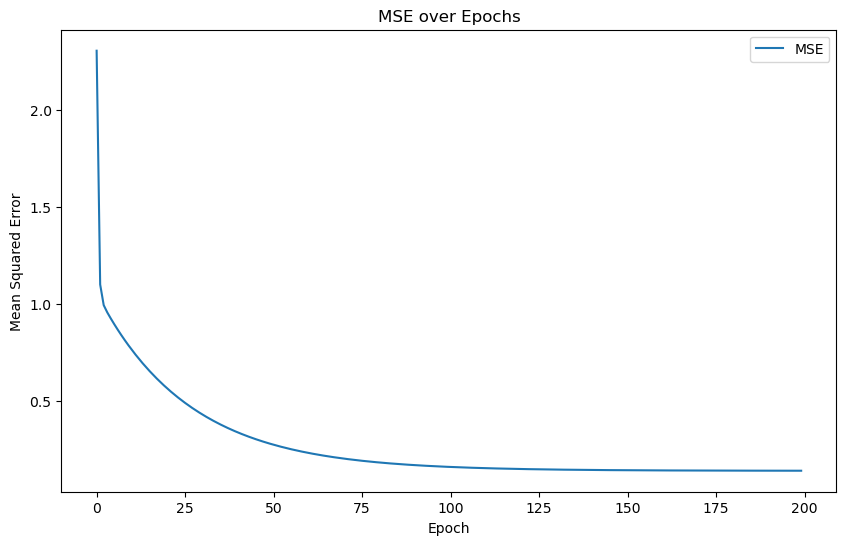

In [23]:
model = AdalineLMS(feature, label);
model.train();

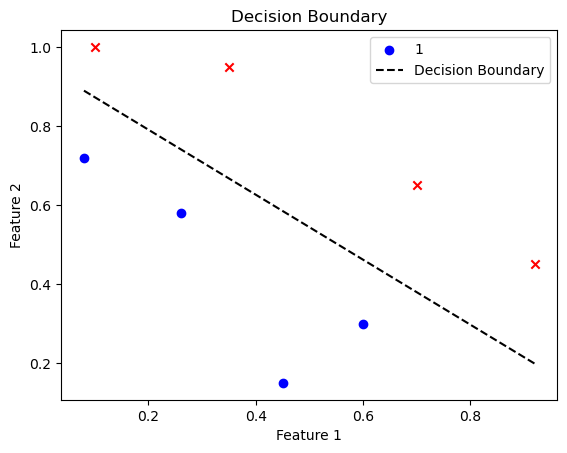

Final weights - weight_x1: -2.9750280786003835 - weight_x2: -3.6172860092608556 - bias: 3.4551537606754774


In [30]:
# Plot decision boundary

for i in range(len(label)):

    if label[i] == 1:
        plt.scatter(feature[i][0], feature[i][1], color='blue', marker='o', label='1' if i == 0 else "");
    else:
        plt.scatter(feature[i][0], feature[i][1], color='red', marker='x', label='-1' if i == 0 else "");

# Plotting the decision boundary
x1_min, x1_max = min(feature[:, 0]), max(feature[:, 0]); # Get min-max for x1

# Get min-max for x2
x2_min = (-model.weight_x1 * x1_min - model.bias) / model.weight_x2;
x2_max = (-model.weight_x1 * x1_max - model.bias) / model.weight_x2;

plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k--', label='Decision Boundary'); #
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.title('Decision Boundary');
plt.legend();
plt.show();

print(f"Final weights - weight_x1: {model.weight_x1} - weight_x2: {model.weight_x2} - bias: {model.bias}");